<a href="https://colab.research.google.com/github/mka-2000/Excelr-assignment/blob/main/Logistic_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We are given with the question of the list of bank .
# We need to predict a best fit of the model for finding its accuracy
# Through Logistic Regression Algorithm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# Loading the Dataset
import pandas as pd
bank = pd.read_csv('bank-full.csv',sep =';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Observing the information

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Checking for null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# shape of bank
X = bank.shape
X

(45211, 17)

In [ ]:
bank = bank.dropna()
bank.shape

(45211, 17)

Therefore no NA values in bank

In [ ]:
# Dividing our data into input and output variables.

Y = bank.iloc[:,-1]
X = bank.iloc[:,0:]
print(Y)
X

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

We take the count of values whether y is subscribed or not.
We see that majority have not subscibed for term deposit.

In [ ]:
   #   LOGISTIC REGRESSION MODEL

In [ ]:
# As Logistic Regression takes only 1's and 0's.We need to replace all the characer types 'yes' and 'no'
# in all the columns by 1's and 0's respectively.
# For this , we can ' MAP ' function which is majorly used in python. 

In [ ]:
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})
bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [ ]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
# Applying dummy variables to other variables.

bank = pd.get_dummies(bank, columns=['job'])
bank = pd.get_dummies(bank, columns=['marital'])
bank = pd.get_dummies(bank, columns=['education'])
bank = pd.get_dummies(bank, columns=['month'])
bank = bank.drop(['contact', 'poutcome'], axis=1)

In [ ]:
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = bank.loc[:, bank.columns != 'y']
Y = bank.loc[:, bank.columns == 'y']

In [ ]:
logreg = LogisticRegression()
logreg.fit(X,Y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X = bank[['default', 'housing', 'loan', 'job_housemaid', 'job_retired', 'job_student', 'marital_married', 'education_primary', 'education_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = bank.loc[:, bank.columns == 'y']

In [ ]:
logit=sm.Logit(y,X)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.329035
         Iterations 7


In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45191
Method:                           MLE   Df Model:                           19
Date:                Thu, 09 Feb 2023   Pseudo R-squ.:                 0.08823
Time:                        13:39:11   Log-Likelihood:                -14876.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
default              -0.3787      0.147     -2.583      0.010      -0.666      -0.091
housing              -0.8781      0.032    -27.113      0.000      -0.942      -0.815
loan                 -0.5724      0.052    -11.078      0.000      -0.674      -0.471
job_housemaid        -0.3289      0.107     -3.063      0.002      -0.539      -0.118
job_retired           0.4625      0.060      7.766      0.000       0.346       0.579
job_student           0.3142      0.083      3.793      0.000       0.152       0.477
marital_married      -0.4290      0.030    -14.327      0.000      -0.488      -0.370
education_primary    -0.4093      0.050     -8.128      0.000      -0.508      -0.311
education_unknown    -0.1917      0.076     -2.526      0.012      -0.340      -0.043
month_aug            -1.6473      0.044    -37.054      0.000      -1.734      -1.560
month_dec             0.2455      0.143      1.721      0.085      -0.034       0.525
month_feb            -1.0118      0.056    -18.069      0.000      -1.122      -0.902
month_jan            -1.6548      0.091    -18.198      0.000      -1.833      -1.477
month_jul            -1.4992      0.048    -31.550      0.000      -1.592      -1.406
month_jun            -1.4979      0.050    -30.193      0.000      -1.595      -1.401
month_mar             0.5074      0.097      5.253      0.000       0.318       0.697
month_may            -1.5674      0.044    -35.900      0.000      -1.653      -1.482
month_nov            -1.4004      0.057    -24.622      0.000      -1.512      -1.289
month_oct             0.1817      0.079      2.290      0.022       0.026       0.337
month_sep             0.2701      0.088      3.053      0.002       0.097       0.443
=====================================================================================
"""

In [ ]:
logreg.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.88


In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     39922
           1       0.49      0.09      0.15      5289

    accuracy                           0.88     45211
   macro avg       0.69      0.54      0.54     45211
weighted avg       0.84      0.88      0.84     45211



In [ ]:
# Confusion Matrix

confusion_matrix(y, y_pred)

array([[39455,   467],
       [ 4833,   456]])

Confusion Matrix Interpretation:

-> From the above Confusion matrix, we can say that,

The diagnol values a=39455 , d = 456 are correct prediction values.
The other diagnol values b=467, c=4833 are wrong prediction values.



In [ ]:
# Finding accuracy
a=39455 
b=467
c=4833
d=456

accuracy = (a+d)/(a+b+c+d)
print('accuracy =',accuracy)

accuracy = 0.8827718917962443


The model gives an accuracy of 0.8827%.

In [ ]:
# Finding Sensitivity and Specificity:

a=39455 
b=467
c=4833
d=456
Sensitivity = a/(a+c)
Specificity = d/(b+d)
print(Sensitivity)
Specificity

0.8908733742774566


0.49404117009750814

Since,we have High Sensitivity , it indicates that it is a good fit.

In [ ]:
# Finding ROC curve

Text(0, 0.5, 'True Positive Rate')

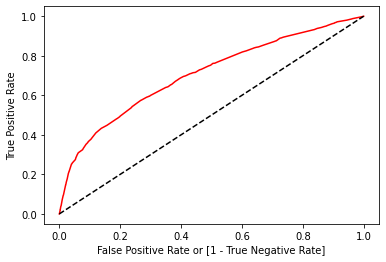

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, logreg.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

0.5372594326946621

# This model has been predicted that the model has an accuracy of 88% and Sensitivity of 89% and Specificity of 49%.Hence , This could be a best fit for the model.